## Quantidade de carros por tipo de gasolina no estado de São Paulo
Os dados deste código foram retirados do site do [Detran.SP](https://www.detran.sp.gov.br/wps/portal/portaldetran/detran/estatisticastransito/3a410653-0dd2-45df-a324-bdfc4711d988), no qual foram avaliados os diferentes tipos de gasolia em uso pela população do estado de São paulo e a quantidade de carros por cada tipo de gasolina diferente. O arquivo csv contendo estes dados estão presentes na pasta data/DETRAN-SP/.

Nome do arquivo: Frota por município, combustível e procedência de 2021.csv

In [1]:
## ignorar esta célula
import sys
sys.path
sys.path.append('/usr/local/lib/python3.8/dist-packages')
sys.path.append('/home/camilo/.local/lib/python3.8/site-packages')
sys.path.append('/usr/lib/python3/dist-packages')
#pip show
#nome = list(df['Tipo de Combustível - Descrição'].unique())

Tipo de Combustível - Descrição
ALCO/GASOL       69434614
ALCOOL           11915602
ALCOOL/GNC           5831
ALCOOL/GNV          74500
DIESEL           11337069
DIESEL/GNC             73
DIESEL/GNV            141
EL FONT EX           9563
EL FONT IN           5272
GAS METANO          23168
GAS/AL/ELE           7833
GAS/ALC/GN         388430
GAS/ELETR           39940
GASOGENIO             672
GASOL/GNC           43812
GASOL/GNV         1248905
GASOLINA         86064599
GNL                    19
GNV                   423
NÃO INFORMADO     3842438
Name: Qtde. Veículo, dtype: int64


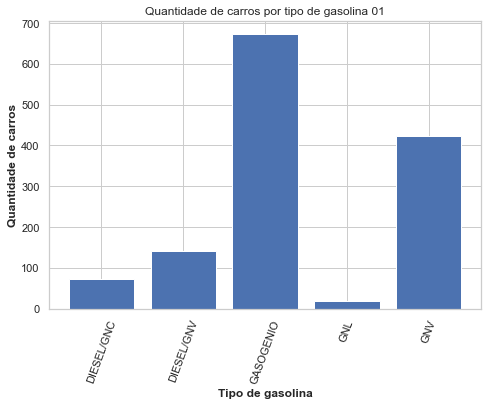

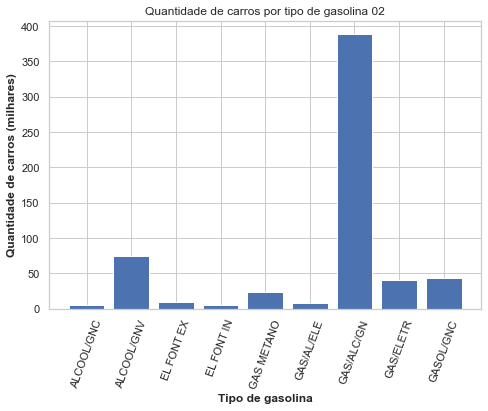

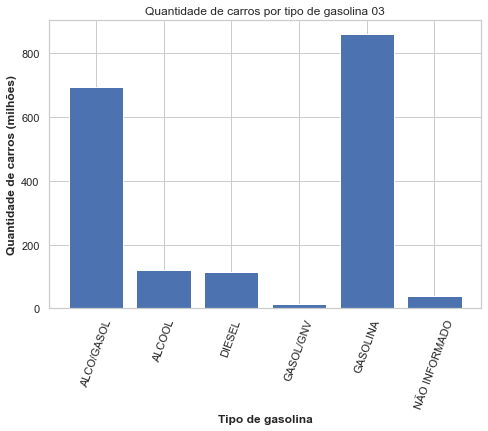

['Município - Descrição']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
pd.get_option("display.max_columns")
directory = 'data/DETRAN-SP/'
file = 'Frota por município, combustível e procedência de 2021.csv'
df = pd.read_csv(directory + file, usecols = ['Tipo de Combustível - Descrição','Qtde. Veículo','Município - Descrição'])


def Lists(file):
    GasType = []
    VehicleQuantity = []
    
    group = file.groupby(['Tipo de Combustível - Descrição'])['Qtde. Veículo'].sum()
    
    for cars in group:
        VehicleQuantity.append(cars)
        
    GasType = list(file['Tipo de Combustível - Descrição'].unique())
    GasType.sort()
    print(group)
    return VehicleQuantity, GasType

VehicleQuantity, GasType = Lists(df)

#quantidade total de veículos = 184442904

zipLits = zip(GasType, VehicleQuantity)
    
def casasDecimais(zipList):
    C100 = []
    C100_000 = []
    C100_000_000 = []
    for i in zipList:
        if i[1] < 1000: 
            C100.append(i)
        elif i[1] < 1000000: 
            C100_000.append(i)
        else:
            C100_000_000.append(i)
    dict1 = dict(C100)
    dict2 = dict(C100_000)
    dict3 = dict(C100_000_000)
    return dict1, dict2, dict3

c1, c2, c3 = casasDecimais(zipLits)

def plot(dictionary,ylabel,xlabel,title,constant,fname):
    sns.set(style="whitegrid")
    fig = plt.figure(tight_layout=False)
    ax = fig.add_axes([0.5,0.5,1,1])
    x = dictionary.keys()
    y = dictionary.values()
    newY = []
    for i in y: 
        ny = i / constant
        newY.append(ny)
    ax.bar(x,newY)
    plt.title(title, fontdict=None, loc='center', pad=None)
    plt.xlabel(xlabel,fontweight='bold')
    plt.ylabel(ylabel,fontweight='bold')
    plt.xticks(rotation = 70)
    plt.savefig('data/results/plots/' + fname + '.png', bbox_inches='tight')
    plt.show()

title = "Quantidade de carros por tipo de gasolina"
xlabel = "Tipo de gasolina"
ylabel = "Quantidade de carros"
plot(c1,ylabel,xlabel,title + " 01",1,"gasoline_01")
plot(c2,ylabel + " (milhares)",xlabel,title + " 02",1000,"gasoline_02")
plot(c3,ylabel + " (milhões)",xlabel,title + " 03",100000,"gasoline_03")

['Tipo de Combustível - Descrição']
['Qtde. Veículo']
['Município - Descrição']



#group = df.groupby(['Tipo de Combustível - Descrição','Município - Descrição'])['Qtde. Veículo'].sum()

